# Parcial primer corte

## Elian Vega
## John Castellón

In [75]:
import io
import sys
PATH = '/home/Elian,john y hector/Data'
DIR_DATA = '../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sys import getsizeof
filename = DIR_DATA + 'precios.csv'

In [125]:
df=pd.read_csv(filename,sep=';',encoding = 'unicode_escape')
dfr=df[['product_name','m','price','pdp_url','brand_name','product_category','retailer','description','rating','review_count','style_attributes','total_sizes','available_size','color']]
dfr.head(10)

,product_name,m,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,Black
1,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,Nude
2,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,White
3,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,Navy
4,'Skinsense' Seamless High Cut Briefs,18.00,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""X-Large"", ""Large"", ""Medium"", ""Small""",Black
5,'Skinsense' Seamless High Cut Briefs,18.00,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Large"", ""Medium""",Sand
6,'Skinsense' Seamless High Cut Briefs,18.00,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Medium"", ""Large"", ""X-Large"", ""Small""",Conch Shell
7,'Annabelle' Lace Garter,23.00,23.00,http://shop.nordstrom.com/s/hanky-panky-annabe...,HANKY PANKY,Sexy Lingerie,Nordstrom US,Scalloped lace adorned with a little blue bow ...,NaN,NaN,"[""Â 77% nylon, 18% spandex, 5% polyester."", ""H...",NaN,NaN,White/ Baby Blue
8,Chrystalle Underwire Balconette Bra,78.00,78.00,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,NaN,NaN,"[""80% nylon, 20% spandex"", ""Hand wash warm, dr...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...",White
9,'B Smooth' Bikini,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,4.3,33.0,"[""Cotton-lined gusset."", ""Shirring on back."", ...","""Small"", ""Medium"", ""Large"", ""X-Large""","""Small"", ""Medium"", ""Large"", ""X-Large""",Black


# Información del dataset

In [126]:
dfr.dtypes

product_name         object
m                    object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

# Eliminar filas vacias

In [127]:
dfr = dfr.dropna(how='all')

# Valores nulos

In [128]:
#verificando si quedan valores nulos
dfr.isnull().any()

product_name        True
m                   True
price               True
pdp_url             True
brand_name          True
product_category    True
retailer            True
description         True
rating              True
review_count        True
style_attributes    True
total_sizes         True
available_size      True
color               True
dtype: bool

# Normalizar registros

In [207]:
dfr['product_name'] = dfr['product_name'].fillna('None')
dfr['m'] = dfr['m'].fillna(0.0)
dfr['price'] = dfr['price'].fillna(0.0)
dfr['pdp_url'] = dfr['pdp_url'].fillna('None')
dfr['brand_name'] = dfr['brand_name'].fillna('None')
dfr['product_category'] = dfr['product_category'].fillna('None')
dfr['retailer'] = dfr['retailer'].fillna('None')
dfr['description'] = dfr['description'].fillna('None')
dfr['rating'] = dfr['rating'].fillna(0.0)
dfr['review_count'] = dfr['review_count'].fillna(0.0)
dfr['style_attributes'] = dfr['style_attributes'].fillna('None')
dfr['available_size'] = dfr['available_size'].fillna('None')
dfr['color'] = dfr['color'].fillna('None')

In [208]:
dfr['price'].astype(str)
price=[]
for x in dfr['price'].values:
    if type(x)==str:
        x=x.replace(u"Â\xa0","")
        x=x.replace('"',"")
        price.append(float(x))
    else:
        price.append(x)

In [209]:
dfr['m'].astype(str)
m=[]
s=0
for x in dfr['m'].values:
    if type(x)==str:
        x=x.replace(u"Â\xa0","")
        x=x.replace('"',"")
        m.append(float(x))
    else:
        m.append(x)

In [210]:
print(len(price),len(m))

614253 614253


In [216]:
#cambiar tipo de manera manual
dfr['m']=m
dfr['price']=price

In [217]:
dfr.head(10)

,product_name,m,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,Black
1,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,Nude
2,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,White
3,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,Navy
4,'Skinsense' Seamless High Cut Briefs,18.0,18.0,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""X-Large"", ""Large"", ""Medium"", ""Small""",Black
5,'Skinsense' Seamless High Cut Briefs,18.0,18.0,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Large"", ""Medium""",Sand
6,'Skinsense' Seamless High Cut Briefs,18.0,18.0,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Medium"", ""Large"", ""X-Large"", ""Small""",Conch Shell
7,'Annabelle' Lace Garter,23.0,23.0,http://shop.nordstrom.com/s/hanky-panky-annabe...,HANKY PANKY,Sexy Lingerie,Nordstrom US,Scalloped lace adorned with a little blue bow ...,0.0,0.0,"[""Â 77% nylon, 18% spandex, 5% polyester."", ""H...",NaN,None,White/ Baby Blue
8,Chrystalle Underwire Balconette Bra,78.0,78.0,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,0.0,0.0,"[""80% nylon, 20% spandex"", ""Hand wash warm, dr...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...",White
9,'B Smooth' Bikini,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,4.3,33.0,"[""Cotton-lined gusset."", ""Shirring on back."", ...","""Small"", ""Medium"", ""Large"", ""X-Large""","""Small"", ""Medium"", ""Large"", ""X-Large""",Black


In [218]:
dfr.dtypes

product_name         object
m                   float64
price               float64
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

# Analisis de marca

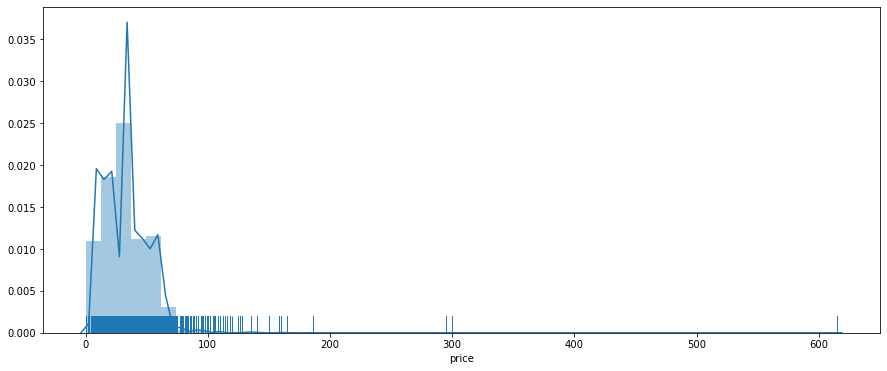

In [245]:
#distribucion del precio
f,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(dfr['price'],rug=True)
plt.show()

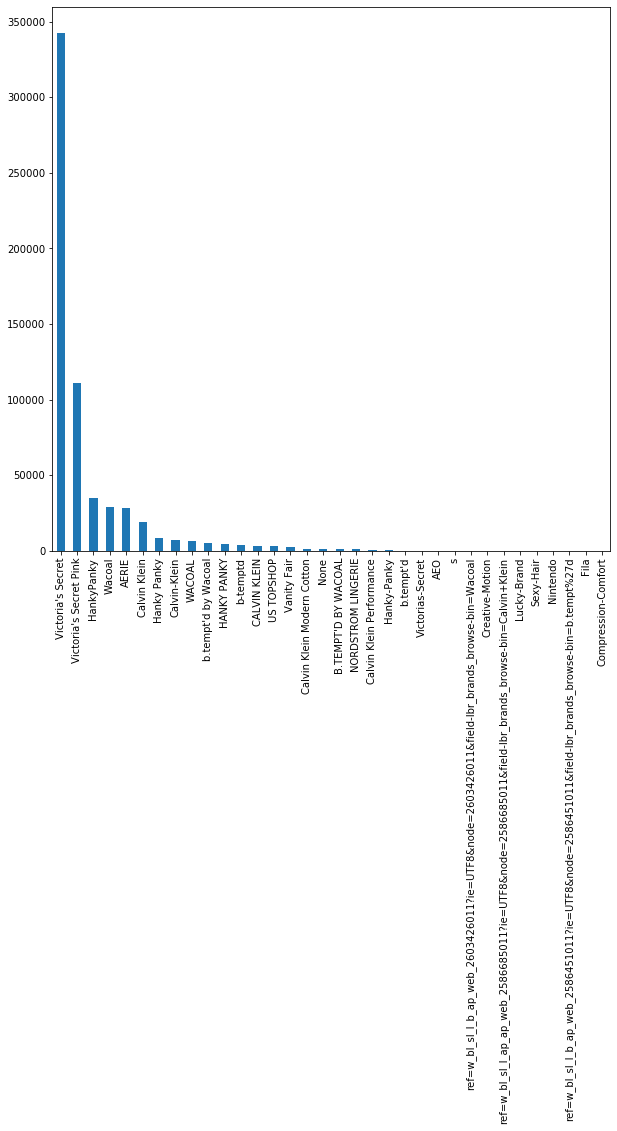

In [121]:
dfr['brand_name'].value_counts().plot(kind="bar",figsize=(10,10))

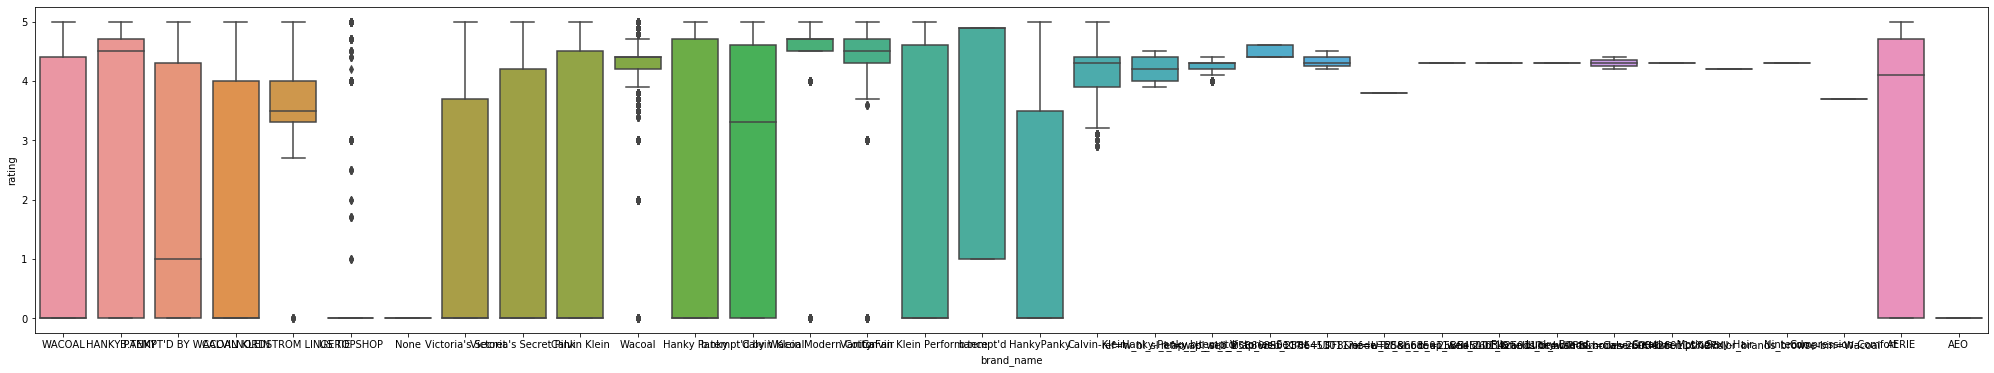

In [90]:
#rating de las marcas
f,ax = plt.subplots(figsize=(35,6))
ax = sns.boxplot(x='brand_name',y='rating',data=dfr)
plt.show()

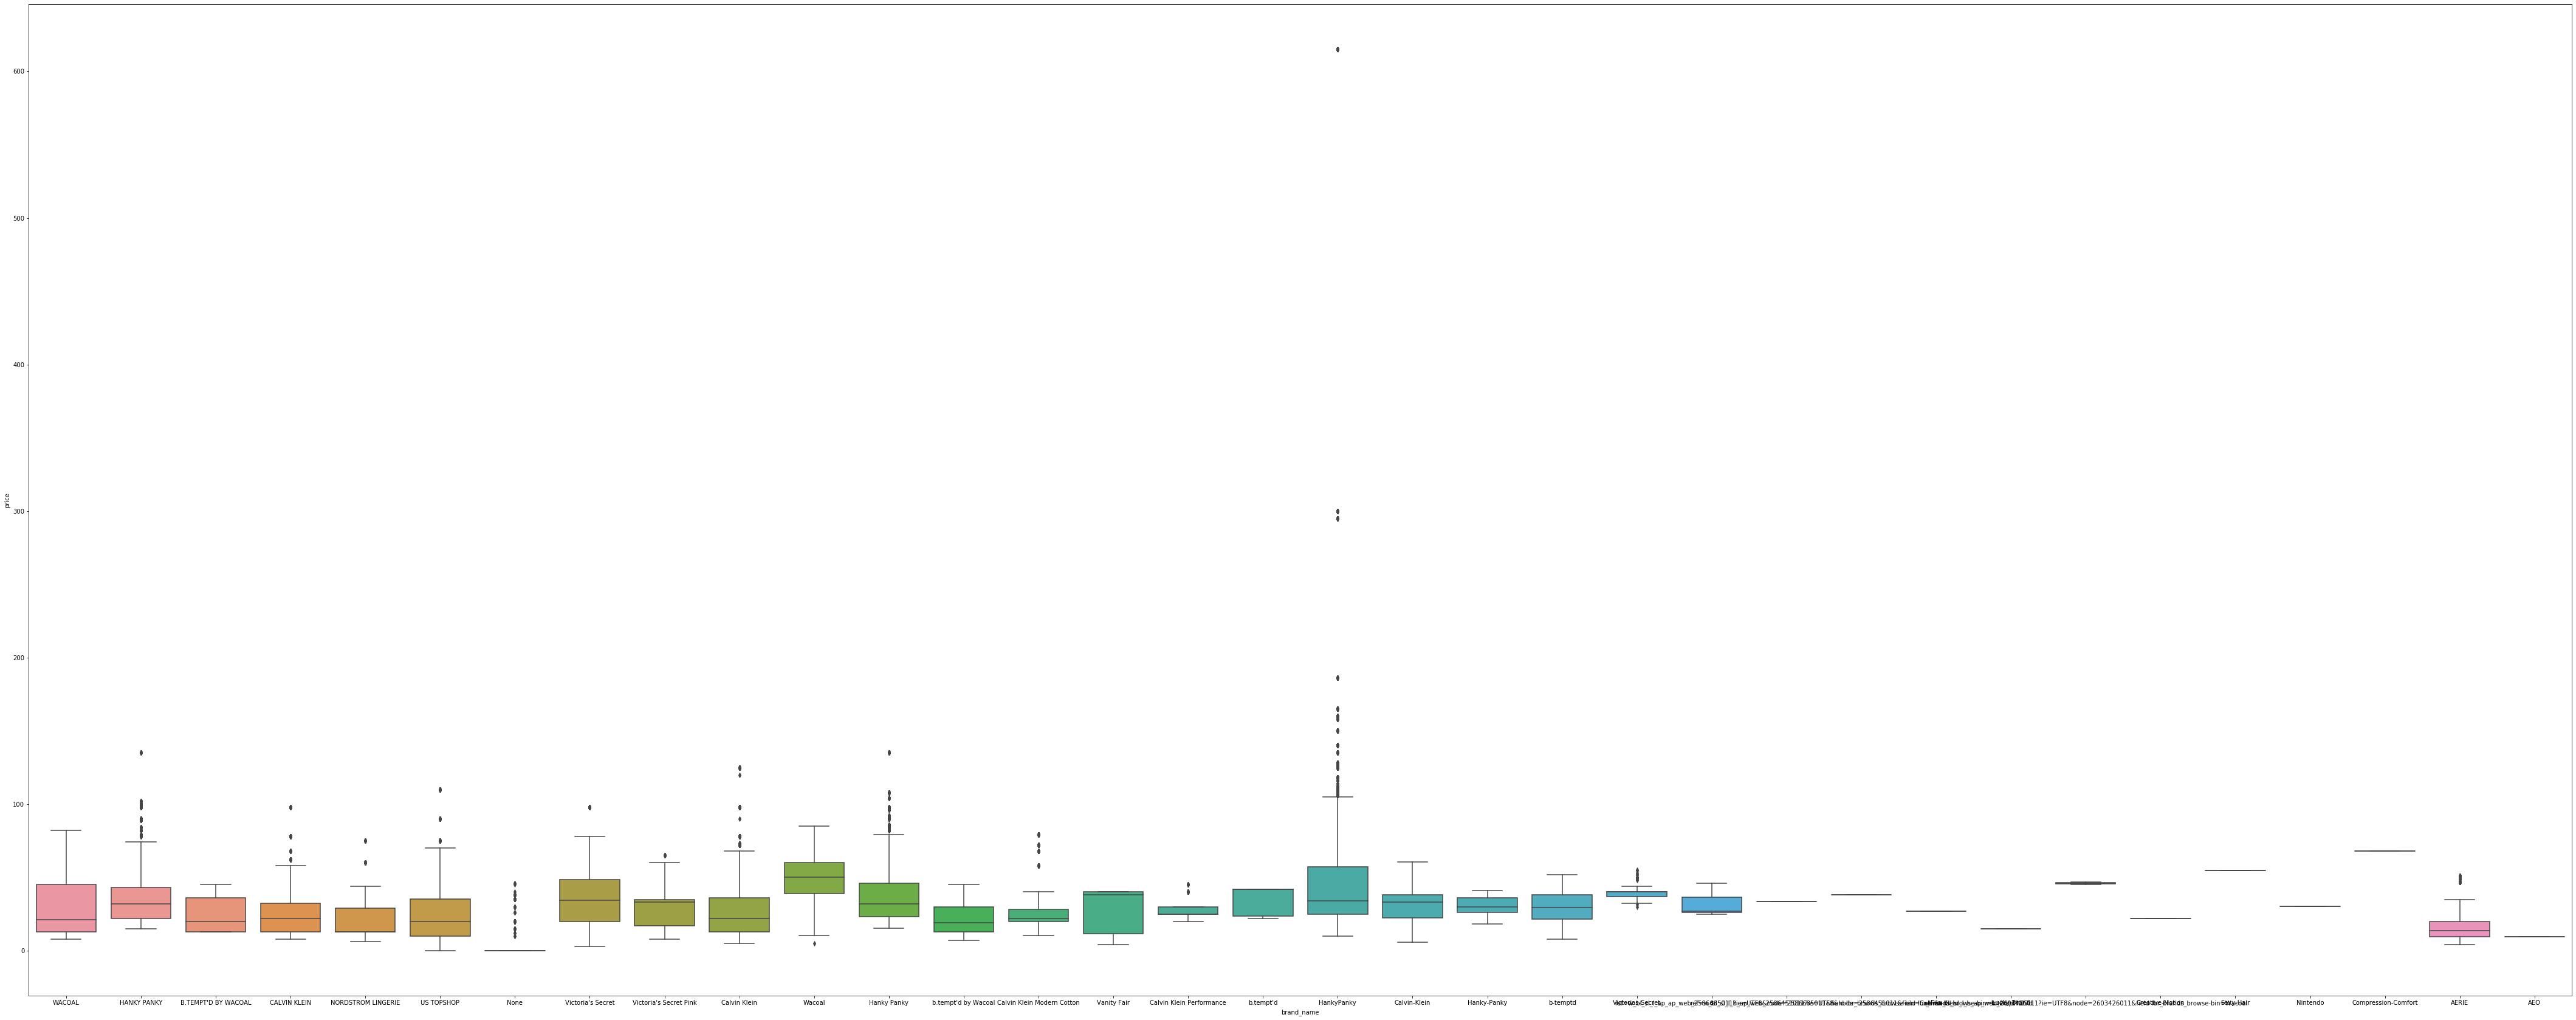

In [241]:
#distribucion del precio para cada marca
f,ax = plt.subplots(figsize=(75,30))
ax = sns.boxplot(x='brand_name',y='price',data=dfr)
plt.show()

In [222]:
lista=list(dfr['available_size'])

In [229]:
lista2=[]
for x in lista:
    lista2.append(x.split(','))

1

In [231]:
total=[len(x) for x in lista2]

In [232]:
len(total)

614253

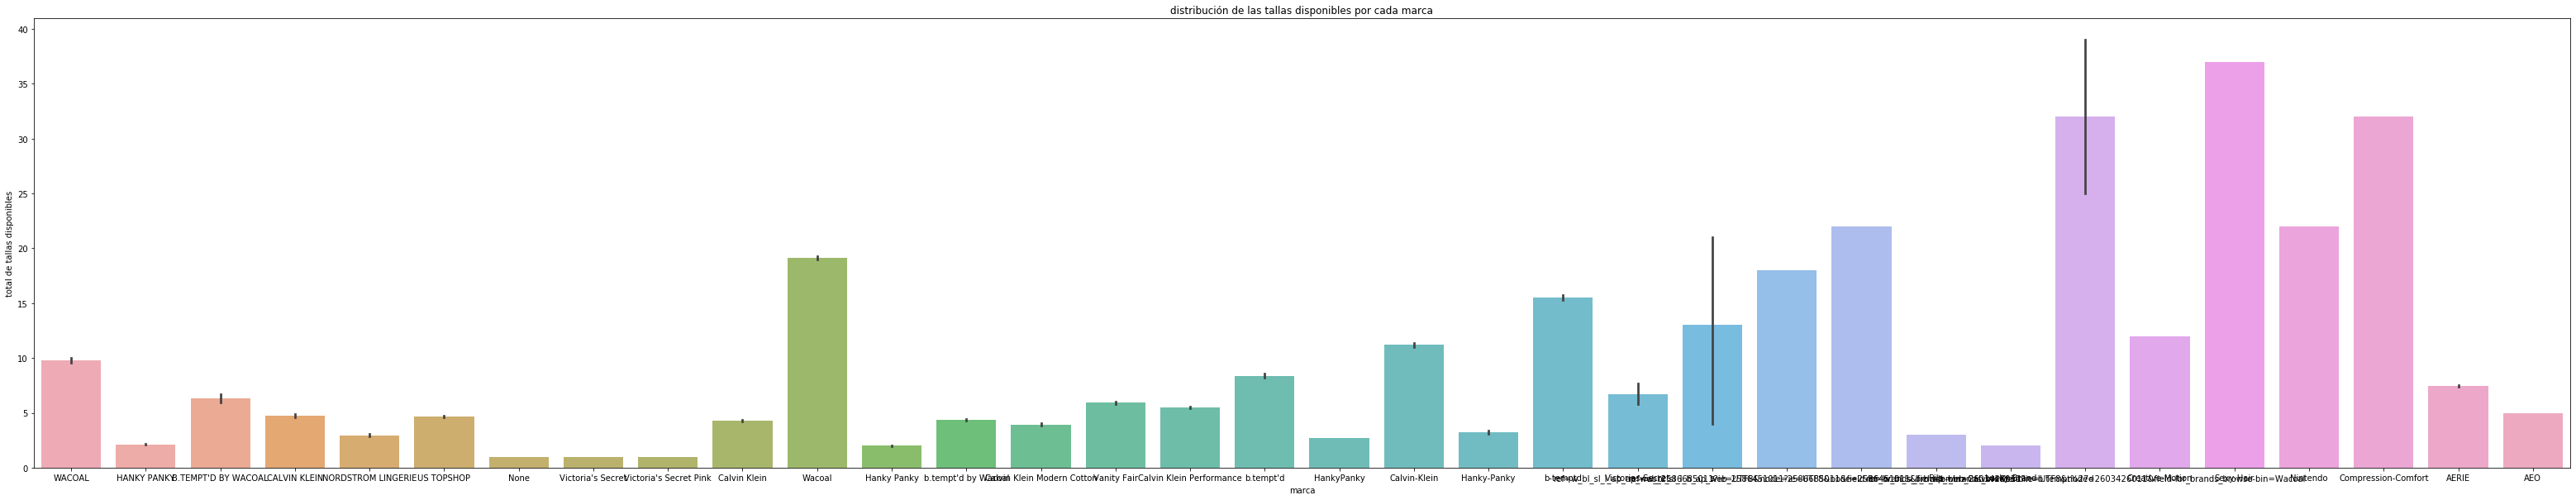

In [236]:
plt.figure(figsize=(55,10))
sns.barplot(dfr['brand_name'].values, total, alpha=0.8)
plt.title('distribución de las tallas disponibles por cada marca')
plt.ylabel('total de tallas disponibles', fontsize=10)
plt.xlabel('marca', fontsize=10)
plt.show()

# colores usados por las marcas

In [123]:
dfr['color'].value_counts()

Black            36959
White            18094
black            13134
pure black        7101
Ensign            6738
                 ...  
BLUE PULSE           1
Null                 1
FLASH                1
Potent Purple        1
Seafoam Green        1
Name: color, Length: 2560, dtype: int64

In [264]:
marca=list(dfr['brand_name'])
color=list(dfr['color'])
vs=[]
vsp=[]
hp=[]
w=[]
ae=[]
for x in range(len(color)):
    if marca[x]=="Victoria's Secret":
        vs.append(color[x])
    elif marca[x]=="Victoria's Secret Pink":
        vsp.append(color[x])
    elif marca[x]=="HankyPanky":
        hp.append(color[x])
    elif marca[x]=="Wacoal":
        w.append(color[x])
    elif marca[x]=="AERIE":
        ae.append(color[x])

In [259]:
def conteo(lista):
    repetido={}
    for x in lista:
        if x in repetido:
            repetido[x]+=1
        else:
            repetido[x]=1
    return repetido

In [260]:
#colores usados por victoria Secrect
conteo(vs)

{'peach melba': 1309,
 'black': 9375,
 'plum dust': 500,
 'ensign blue': 2926,
 'fair orchid': 835,
 'windy blue': 846,
 'coconut white': 3488,
 'Multi Slasher Stripe': 463,
 'Hello Lovely': 5159,
 'Black': 17000,
 'Black Marl': 4740,
 'Grey Oasis': 1522,
 'Blackberry': 2434,
 'Black/Victoria Sport Logo Waistband': 177,
 'White/Victoria Sport Logo/Black Waistband': 410,
 'cadette green': 1122,
 'champagne floral print': 261,
 'faded denim': 1232,
 'silver sea floral print': 264,
 'ruby wine': 686,
 'cozumel teal': 931,
 'so silver': 30,
 'fir green': 1017,
 'Candy Apple': 1368,
 'Ensign': 6738,
 'Sterling Pewter': 1785,
 'Sheer Pink': 4985,
 'Black on Black': 420,
 'Coconut White': 2771,
 'Powder Blush': 1603,
 'Windy Blue': 473,
 'Fir Lace-Up Front': 120,
 'Mulled Grape Lace-Up Front': 310,
 'Champagne Lace-Up Front': 248,
 'Radiating Aztec': 4862,
 'Burnished Lilac': 4518,
 'Fir Racerback': 90,
 'Mulled Grape Racerback': 90,
 'Sheer Pink Racerback': 90,
 'Chintz Rose': 365,
 'Fair Or

In [261]:
#colores usados por victoria Secrect Pink
conteo(vsp)

{'ruby beauty': 1108,
 'red pepper palm print': 554,
 'venetian teal': 590,
 'neon princess': 722,
 'buff': 4576,
 'forever young': 793,
 'fresh violet': 132,
 'pure black': 7101,
 'sienna': 1276,
 'pink on fleek': 469,
 'dark and stormy': 189,
 'marble': 340,
 'cocoon': 1697,
 'black': 3759,
 'baby pink': 776,
 'Abstract Palm': 41,
 'Amethyst Cloud': 141,
 'Black': 474,
 'triumph white': 4265,
 'red tropical print': 2380,
 'bayberry': 5441,
 'cocoon palm print': 998,
 'midnight tropical': 2635,
 'battle blue': 1082,
 'red pepper birds of paradise': 289,
 'amethyst logo': 289,
 'neon sunset logo print': 1774,
 'heather grey': 324,
 'Black Palm Print': 32,
 'watercolor': 585,
 'beverly hills pink': 411,
 'heather charcoal': 182,
 'Heather White Tiger/Petal Pink': 61,
 'green opal': 740,
 'hot coral': 188,
 'majestic saphire': 687,
 'snow white': 497,
 'Marl Grey': 18,
 'brilliant purple': 261,
 'PINK logo': 509,
 'battle blue with mini logo': 248,
 'blue marble with mini logo': 626,
 's

In [267]:
#colores usados por hankypanky
conteo(hp)

{'Black': 4712,
 'Mocha': 373,
 'Light Ivory': 757,
 'Black Plum': 99,
 'Rainbow': 73,
 'Aloha': 249,
 'Bermuda Nights': 222,
 'Breton Stripe': 131,
 'Capri Bloom': 348,
 'Check Please': 151,
 'Pretty Leopard': 95,
 'Queen of Hearts': 49,
 'Resort Floral': 49,
 'Sand Art': 190,
 'Star Spangled': 224,
 'Tangram': 49,
 'Violet Spray': 248,
 'Heather Grey': 37,
 'Leopard': 75,
 'Black/ Blue': 257,
 'Cygnet/Vanilla': 278,
 'Heather Grey Amethyst': 56,
 'Vivid Coral/Marshmallow': 249,
 'White/Dotted Tulle': 45,
 'Elba': 75,
 'Laguna Beach': 50,
 'New Classics': 97,
 'Sun City': 74,
 'Tobago': 97,
 'Chai': 1374,
 'Granite': 686,
 'Marshmallow': 883,
 'Wild Orchid': 111,
 'Bellisima': 245,
 'Chalk Stripe': 109,
 'White': 1814,
 'Bliss Pink': 586,
 'Blossom': 154,
 'Buttercup': 172,
 'Cappuccino': 162,
 'Celeste Blue': 177,
 'Dove': 159,
 'Dusk': 148,
 'Electric Orchid': 173,
 'Forget Me Not': 77,
 'Ivory': 489,
 'Lemongrass': 159,
 'Navy Blue': 290,
 'Passionate Pink': 206,
 'Periwinkle': 141

In [265]:
#colores usados por wacoal
conteo(w)

{'Black': 6137,
 'Naturally Nude/Ivory': 149,
 'Delicious White': 151,
 'Naturally Nude/ Ivory': 24,
 'Ivory': 2210,
 'French Nude': 242,
 'Platinum/Fuschia Purple': 36,
 'Royal Blue/Gray': 36,
 'Naturally Nude': 3682,
 'White': 1465,
 'Blush': 57,
 'Navy': 57,
 'Blue Turquoise': 530,
 'Conch Shell': 305,
 'Bachelor Button': 142,
 'Sharp Green/Waterfall': 31,
 'Lilac Sachet Multi': 101,
 'Cappuccino': 1172,
 'Minimal Gray': 30,
 'Sand': 814,
 'Frost Gray': 52,
 'Campanula': 484,
 'Nude/Ivory': 217,
 'Mahogany Rose': 127,
 'Almond Blossom': 535,
 'Cashmere Rose': 158,
 'Lavender Frost': 198,
 'Pink Yarrow': 30,
 'High Rise/Crystal Rose/Peacoat': 54,
 'Nude, Cappucino, Black': 54,
 'Violet': 69,
 'Dark Denim': 62,
 'Purple Wine': 26,
 'Blue Heron': 97,
 'Pecan': 398,
 'Gardenia': 339,
 'Toast': 1396,
 'Frost Gray/Primrose': 165,
 'Lilac Sachet': 96,
 'Tango Red/Coral Blush': 162,
 'Frost Gray/Teaberry': 144,
 'Deep Sea Blue': 121,
 'Deep Taupe': 462,
 'Cappucino': 82,
 'Wild Aster': 149,

In [266]:
#colores usados por AERIE
conteo(ae)

{'Rugged Green': 186,
 'Natural Nude': 1051,
 'True Black': 4401,
 'White': 1298,
 'Royal Navy': 546,
 'Slab Gray': 646,
 'Buff': 847,
 'Stone': 216,
 'Deep Plum': 1720,
 'Dark Heather': 875,
 'Coral': 441,
 'Bright Cobalt': 158,
 'Valentine': 660,
 'Maroon Lagoon': 502,
 'Heather Gray': 67,
 'Fresh Bright': 636,
 'Balmy Teal': 389,
 'Navy': 2184,
 'Bright Blue': 160,
 'Creme Blue': 666,
 'Pink Boom': 27,
 'Pink Punch': 27,
 'Heather Frost': 348,
 'Newport Navy': 32,
 'Light Heather': 381,
 'Current Coral': 827,
 'Alpha Turquoise': 678,
 'Olive Fun': 187,
 'Fall Mint': 554,
 'Light Blue': 344,
 'Basic Navy': 147,
 'Soft Muslin': 854,
 'Berry': 165,
 'Pink Tint': 590,
 'Medium Heather': 135,
 'South Peach': 100,
 'Darkness Falls': 260,
 'Ballet Pink': 241,
 'Somber Navy': 199,
 'Maui Teal': 51,
 'Red Cord': 229,
 'Air White': 28,
 'Stargaze': 517,
 'Black': 24,
 'Deep Burgundy': 360,
 'Smoked Gray': 153,
 'Vanity Peach': 452,
 'Bright Neon Green': 60,
 'Ocean Mist': 15,
 'Jade': 111,
 '

# Algoritmo de predicción

Se usará la regresión lineal para predecir el precio de una marca en especifico, en este caso  AERIE, para ello se usarán las columnas que a nuestro parecer sirven para determinar el precio de un producto, como la descripción, los atributos y el rating que es